### Here let's go through an example where we have a spatially inhomogenous data 

Similar to spatially adaptive splines we can preset our difference matrix for better performance

In [1]:
import sys

sys.path.append("../")
sys.path.append("../../")

import numpy as np
from matplotlib import pyplot as plt

from matrix_algorithms.difference_matrix import Difference_Matrix
from cv_tf import cross_validation
from adaptive_tf import adaptive_tf

from evaluation_metrics.loss_functions import compute_error
from kernel_methods.local_var import LocalVariance

array([[-4.70778804e-01],
       [ 2.83713431e+00],
       [ 3.52726200e-01],
       [-6.53077800e-02],
       [ 1.35230898e+00],
       [ 2.07274991e+00],
       [ 9.64374401e-02],
       [ 1.42272633e-01],
       [ 6.72893639e-01],
       [ 6.47639369e-01],
       [ 1.02984454e+00],
       [ 1.87817090e+00],
       [ 1.32293611e+00],
       [ 1.19725961e-01],
       [ 1.61773263e+00],
       [-3.87080373e-01],
       [-8.22097856e-01],
       [ 1.49510461e+00],
       [ 1.46864165e+00],
       [-2.94892173e-01],
       [ 1.31775606e+00],
       [-3.23710759e-01],
       [-6.11559780e-01],
       [ 3.22037379e-01],
       [ 8.96577354e-01],
       [ 2.10925101e+00],
       [ 2.31836280e+00],
       [ 5.73240653e-01],
       [ 2.46059652e+00],
       [ 3.51330715e-01],
       [ 1.95931715e+00],
       [ 7.40583708e-01],
       [ 1.38843896e+00],
       [ 1.03489813e+00],
       [ 7.76013992e-01],
       [ 1.41642933e+00],
       [-1.14023931e+00],
       [-7.38697869e-01],
       [-7.0

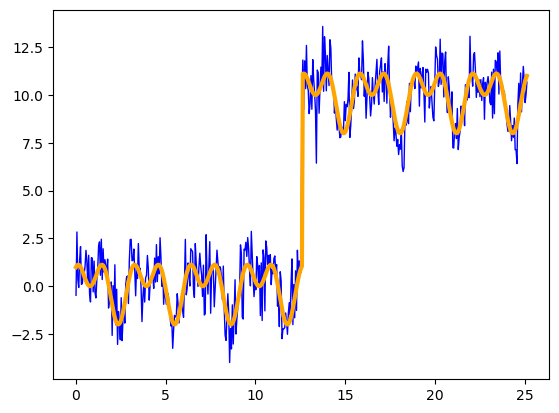

In [102]:
def generate_spatially_inhomogenous_data():

    # generate data
    n = 250

    x = np.zeros( 2 * n)

        # generate time
    t = np.linspace(0, 8*np.pi, 2 * n)
    t1=t[0:n]
    t2=t[n:2*n]
    t3=t[2*n:3*n]

    # generate spatially inhomogenous data
    # x[0:n] = np.sin(4*t1) + np.random.normal(0, 0.5, n)+1
    # x[n:2*n] = 3*np.sin(2*t2) + np.random.normal(0, 1.25, n)+2
    # x[2*n:3*n] = 0.5*np.sin(2*t3) + np.random.normal(0, 0.7, n)-0.25*t3+6

    x[0:n] = np.sin(2*t1) +np.cos(4*t1)+ np.random.normal(0, 1, n)
    x[n:2*n] = np.sin(2*t2) + np.cos(4*t2)+np.random.normal(0, 1, n)+10




    true_fun=np.sin(2*t) +np.cos(4*t)+10*(t>t[250])


    return x, t, true_fun
    

x,t,true_fun=generate_spatially_inhomogenous_data()

plt.plot(t,x,color='blue',lw=1)
plt.plot(t,true_fun,color='orange',lw=3)

x=x.reshape(-1,1)
x


### Piecewise Linear Comparison

In [103]:
D=Difference_Matrix(len(t), 1)

best_lambda=cross_validation(x,D,10,3)

 WARNING Condition number is large: 1997699019.6659234
Performing  0 out of 3 iterations of cross validation
 WARNING Condition number is large: 1095479998.9422433
Performing cross validation for lambda = 0.955705805172369
Performing cross validation for lambda = 2.659308173926307
Performing cross validation for lambda = 7.399682962724901
Performing cross validation for lambda = 20.59005740128203
Performing cross validation for lambda = 57.29305781392174
Performing cross validation for lambda = 159.4213367013244
Performing cross validation for lambda = 443.5993393506977
Performing cross validation for lambda = 1234.341512523152
Performing cross validation for lambda = 3434.6285812058613
Performing cross validation for lambda = 9557.05805172369
Performing  1 out of 3 iterations of cross validation
 WARNING Condition number is large: 1056280183.1700287
Performing cross validation for lambda = 0.8907585672965803
Performing cross validation for lambda = 2.478588626527648
Performing cross v

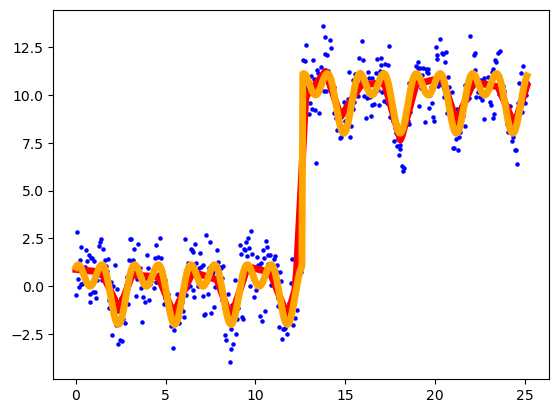

In [104]:
results=adaptive_tf(x,D,best_lambda)

sol=results['sol'].x.reshape(-1,1)

plt.plot(t,sol,label='solution',color='red',lw=5)
plt.scatter(t,x,label='data',color='blue',s=5)
plt.plot(t,true_fun,label='true function',color='orange',lw=5)


In [105]:
compute_error(true_fun,sol.flatten())

0.45867889914958665

### Second Order Comparison

In [106]:
D=Difference_Matrix(len(t), 2)

best_lambda=cross_validation(x,D,10,3)

 WARNING Condition number is large: 16249573421870.842
Performing  0 out of 3 iterations of cross validation
 WARNING Condition number is large: 9317672663413.604
Performing cross validation for lambda = 134.2326099138524
 WARNING Condition number is large: 1150521741.8401997
Performing cross validation for lambda = 373.5102107985914
 WARNING Condition number is large: 1150521741.8401997
Performing cross validation for lambda = 1039.3143488779851
 WARNING Condition number is large: 1150521741.8401997
Performing cross validation for lambda = 2891.953913319211
 WARNING Condition number is large: 1150521741.8401997
Performing cross validation for lambda = 8047.033552256064
No solution found for lambda = 8047.033552256064
Status: maxiter exceeded
Performing cross validation for lambda = 22391.34887070632
No solution found for lambda = 22391.34887070632
Status: maxiter exceeded
Performing cross validation for lambda = 62305.25832828371
No solution found for lambda = 62305.25832828371
Status

 WARNING Condition number is large: 1997699019.6659234


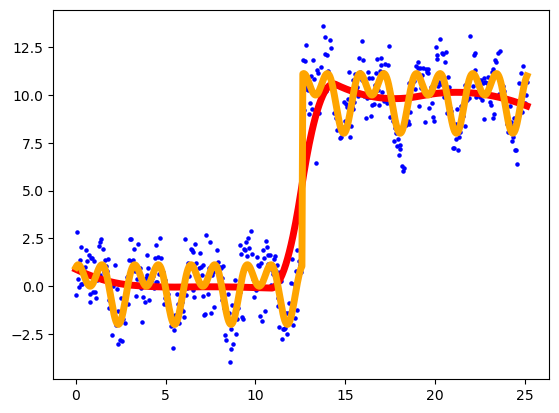

In [107]:
results=adaptive_tf(x,D,best_lambda)

sol=results['sol'].x.reshape(-1,1)

plt.plot(t,sol,label='solution',color='red',lw=5)
plt.scatter(t,x,label='data',color='blue',s=5)
plt.plot(t,true_fun,label='true function',color='orange',lw=5)


In [108]:
compute_error(true_fun,sol.flatten())

1.8603155206487676

### Calibration of Adaptive Weighting Scheme

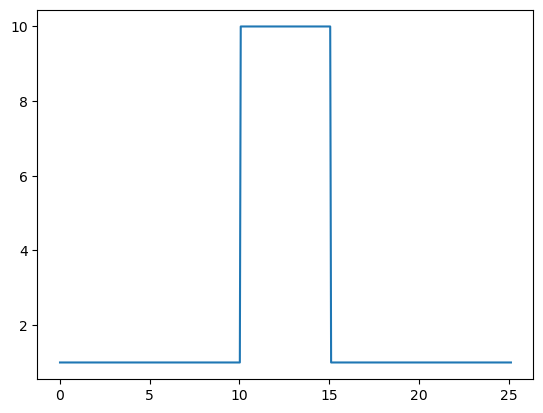

In [144]:
pen=np.ones(len(t))

pen[200:300]=10

pen=pen

plt.plot(t,pen)


In [145]:
D=Difference_Matrix(len(t),2,prior=pen)

 WARNING Condition number is large: 751045326893947.9


In [146]:
best_lambda=cross_validation(x,D,10,3)

Performing  0 out of 3 iterations of cross validation
 WARNING Condition number is large: 394195026022949.7
Performing cross validation for lambda = 107.28476040230692
 WARNING Condition number is large: 59409003640.246
Performing cross validation for lambda = 298.52621877097783
 WARNING Condition number is large: 59409003640.246
Performing cross validation for lambda = 830.666936846525
 WARNING Condition number is large: 59409003640.246
Performing cross validation for lambda = 2311.3800952248885
No solution found for lambda = 2311.3800952248885
Status: maxiter exceeded
Performing cross validation for lambda = 6431.552416042416
No solution found for lambda = 6431.552416042416
Status: maxiter exceeded
Performing cross validation for lambda = 17896.17664604678
No solution found for lambda = 17896.17664604678
Status: maxiter exceeded
Performing cross validation for lambda = 49797.174590017006
No solution found for lambda = 49797.174590017006
Status: maxiter exceeded
Performing cross valid

 WARNING Condition number is large: 107201533155.65053


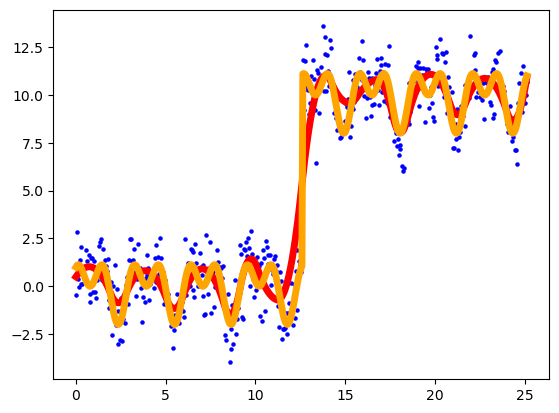

In [147]:
results=adaptive_tf(x,D,best_lambda)

sol=results['sol'].x.reshape(-1,1)

plt.plot(t,sol,label='solution',color='red',lw=5)
plt.scatter(t,x,label='data',color='blue',s=5)
plt.plot(t,true_fun,label='true function',color='orange',lw=5)


In [148]:
error=compute_error(true_fun,sol.flatten())
error

1.017923754946865